# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайны: 
* ФИВТ, третий курс - 4 марта 23:59
* Открытый курс - 7 марта, 23:59
</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [1]:
import numpy as np
import pandas as pd

In [ ]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

A = np.random.randint(0,100,(10,10))
print(A)
print(A.shape)

In [ ]:
# Посчитайте средние значения в матрице по столбцам

A.mean(axis=0)

In [ ]:
# Транспонируйте матрицу A

A.T

In [ ]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

A * A.T

In [ ]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

B = A @ A
print(B)

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [2]:
all_data = pd.read_csv('forest_dataset.csv')

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [3]:
train_size = 0.2
ind = int(all_data.shape[0] * train_size)
delayed_data = all_data[:ind]
all_data = all_data[ind:]


Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [4]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [6]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [7]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix,two_class_labels)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [8]:
lr_clf = LogisticRegression(solver='liblinear')

In [9]:
lr_clf.fit(train_feature_matrix,train_labels)
print('Accuracy score:',accuracy_score(test_labels,lr_clf.predict(test_feature_matrix)))
print('F1 score:',f1_score(test_labels,lr_clf.predict(test_feature_matrix)))

Accuracy score: 0.7761542957334892
F1 score: 0.7458526874585268


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [19]:
from sklearn.preprocessing import StandardScaler

lr_clf = LogisticRegression(multi_class='multinomial',max_iter=1000, tol=0.001)

X_train, X_test, y_train, y_test = train_test_split(feature_matrix,labels,test_size=0.2,random_state=42)
sclr = StandardScaler()
X_train_scaled = sclr.fit_transform(X_train)
X_test_scaled = sclr.transform(X_test)


C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': np.linspace(0.01, 1, 10),
    'solver': ['sag','saga']
}
grid = GridSearchCV(lr_clf,param_grid,cv=5, scoring='accuracy')
grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'solver': ['sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [21]:
grid.cv_results_

C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\

{'mean_fit_time': array([0.30220251, 0.65266037, 1.25864363, 2.59806714, 1.6428288 ,
        3.09772539, 2.1533299 , 3.14739218, 1.96656289, 3.37598329,
        2.04353991, 3.51911311, 2.15166192, 3.55629883, 2.20173569,
        3.64807076, 2.25739174, 3.6620163 , 2.24599752, 3.72644763]),
 'std_fit_time': array([0.02576317, 0.02251049, 0.02832149, 0.24447337, 0.04934607,
        0.10778238, 0.18321709, 0.03764392, 0.04638833, 0.09655046,
        0.04749237, 0.09817677, 0.04445416, 0.04412298, 0.05649323,
        0.07954675, 0.07342551, 0.10784656, 0.0617217 , 0.13230972]),
 'mean_score_time': array([0.00059261, 0.00079217, 0.00080209, 0.00099244, 0.00039325,
        0.00079761, 0.00098839, 0.0004004 , 0.00058727, 0.00039625,
        0.        , 0.00039878, 0.00059853, 0.00039344, 0.00039287,
        0.00058789, 0.00019894, 0.        , 0.00059876, 0.00059814]),
 'std_score_time': array([4.84319598e-04, 3.96277057e-04, 4.01074602e-04, 2.24136798e-05,
        4.81720184e-04, 7.45932411e-

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

[0.7065625  0.70671875 0.7115625  0.71171875 0.71328125 0.7125
 0.71375    0.71375    0.71453125 0.7134375  0.71515625 0.71359375
 0.71484375 0.71390625 0.715      0.71453125 0.71515625 0.7146875
 0.715      0.7146875 ]
[0.70671875 0.71171875 0.7125     0.71375    0.7134375  0.71359375
 0.71390625 0.71453125 0.7146875  0.7146875 ]
[0.7065625  0.7115625  0.71328125 0.71375    0.71453125 0.71515625
 0.71484375 0.715      0.71515625 0.715     ]


Text(0.5, 1.0, 'accuracy score with L2 regularization')

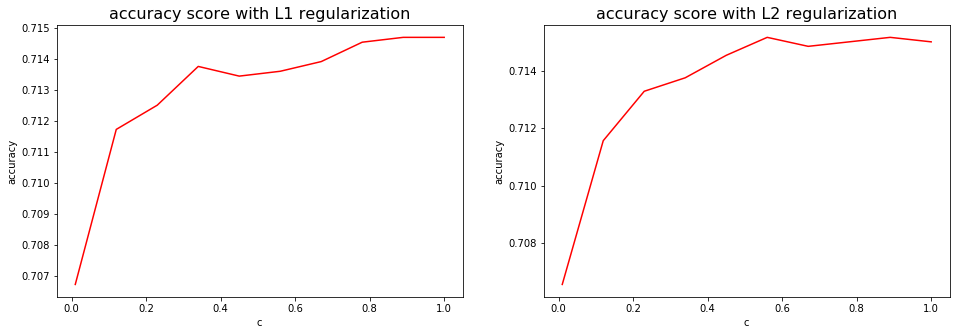

In [23]:
import matplotlib.pyplot as plt

x_c = np.linspace(0.01, 1, 10)
print(grid.cv_results_['mean_test_score'])
y_l1 = grid.cv_results_['mean_test_score'][1::2]
y_l2 = grid.cv_results_['mean_test_score'][::2]
print(y_l1)
print(y_l2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
axes[0].plot(x_c, y_l1, 'r')
axes[0].set_xlabel('c')
axes[0].set_ylabel('accuracy')
axes[0].set_title(f'accuracy score with L1 regularization', fontsize=16)
axes[1].plot(x_c, y_l2, 'r')
axes[1].set_xlabel('c')
axes[1].set_ylabel('accuracy')
axes[1].set_title(f'accuracy score with L2 regularization', fontsize=16)

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [24]:
# Видим, что при увеличении коэффициента регуляризации увеличивается средняя точность на тестовой выборке
print(grid.best_estimator_.C)
print(grid.best_estimator_.penalty)

0.56
l2


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [26]:
#grid.best_estimator_.fit(X_train_scaled,y_train)
probs_matrix = grid.best_estimator_.predict_proba(X_test_scaled)

Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [27]:
print(probs_matrix.mean(axis=0))
print(np.unique(y_train, return_counts=True)[1]/X_train.shape[0])

[0.35960783 0.4879621  0.06603748 0.00564898 0.01812308 0.03216561
 0.03045491]
[0.37046875 0.48671875 0.05796875 0.004375   0.01765625 0.0296875
 0.033125  ]


#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn_clsfr = KNeighborsClassifier()

Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [29]:
param_grid_knn = {
    'n_neighbors': np.arange(1,11),
    'weights': ['uniform','distance']
}
grid_knn = GridSearchCV(knn_clsfr,param_grid_knn,cv=5, scoring='accuracy')
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Text(0.5, 1.0, "Accuracy with distance param 'uniform'")

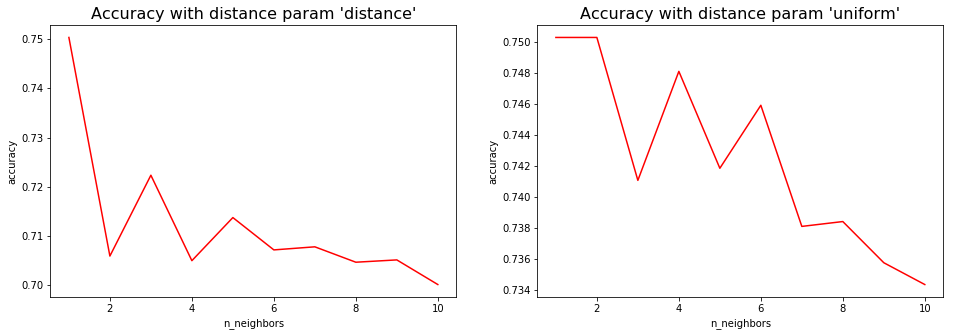

In [30]:
x_knn = np.arange(1,11)
y_dist = grid_knn.cv_results_['mean_test_score'][::2]
y_uni = grid_knn.cv_results_['mean_test_score'][1::2]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
axes[0].plot(x_knn, y_dist, 'r')
axes[0].set_xlabel('n_neighbors')
axes[0].set_ylabel('accuracy')
axes[0].set_title(f"Accuracy with distance param 'distance'", fontsize=16)
axes[1].plot(x_knn, y_uni, 'r')
axes[1].set_xlabel('n_neighbors')
axes[1].set_ylabel('accuracy')
axes[1].set_title(f"Accuracy with distance param 'uniform'", fontsize=16)

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [31]:
grid_knn.best_estimator_.predict_proba(X_test)

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [32]:
y_delayed = delayed_data[delayed_data.columns[-1]].values
X_delayed = delayed_data[delayed_data.columns[:-1]].values
#print(y_delayed)
#print(X_delayed)
print('KNN prediction:',accuracy_score(y_delayed,grid_knn.best_estimator_.predict(X_delayed)))
print('Logreg prediction:',accuracy_score(y_delayed,grid.best_estimator_.predict(sclr.transform(X_delayed))))

KNN prediction: 0.7585
Logreg prediction: 0.725


C:\Users\priboi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Как видим, метод ближайшего соседа(где число соседей равно единице) в данном случае сработал лучше.